In [14]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import csv
import pandas as pd

# Stack Overflow Tag Network dataset visualizations using NetworkX

The dataset is organized as two tables:

stack_network_links contains links of the network, the source and target tech tags plus the value of the the link between each pair stack_network_nodes contains nodes of the network, the name of each node, which group that node belongs to (calculated via a cluster walktrap), and a node size based on how often that technology tag is used

In [15]:
edges = pd.read_csv("input/stack_network_links.csv") 

edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [16]:
vertex = pd.read_csv("input/stack_network_nodes.csv") 
vertex.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [17]:
# Create empty graph
g = nx.Graph()

In [18]:
# Add edges and edge attributes
for i, elrow in edges.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[2], attr_dict=elrow[2:].to_dict())

In [19]:
# Add node attributes
for i, nlrow in vertex.iterrows():
    g.add_node(nlrow['name'], color=nlrow['group'], nodesize=nlrow['nodesize'])

In [20]:
list(g.edges(data=True))[0:5]

[('ruby',
  'ruby-on-rails',
  {'attr_dict': {'value': 95.3613107122033}, 'weight': 95.3613107122033}),
 ('ruby',
  'postgresql',
  {'attr_dict': {'value': 21.79517505760149}, 'weight': 21.79517505760149}),
 ('unix',
  'linux',
  {'attr_dict': {'value': 25.35741287423995}, 'weight': 25.35741287423995}),
 ('node.js',
  'express',
  {'attr_dict': {'value': 58.82907662295929}, 'weight': 58.82907662295929}),
 ('node.js',
  'javascript',
  {'attr_dict': {'value': 42.731729323056385}, 'weight': 42.731729323056385})]

In [21]:
list(g.nodes(data=True))[0:10]

[('ruby', {'color': 3, 'nodesize': 70.14}),
 ('unix', {'color': 5, 'nodesize': 15.67}),
 ('node.js', {'color': 3, 'nodesize': 117.36}),
 ('photoshop', {'color': 6, 'nodesize': 12.62}),
 ('objective-c', {'color': 4, 'nodesize': 47.01}),
 ('apache', {'color': 5, 'nodesize': 13.17}),
 ('bootstrap', {'color': 6, 'nodesize': 13.28}),
 ('rest', {'color': 8, 'nodesize': 27.08}),
 ('iphone', {'color': 4, 'nodesize': 15.29}),
 ('api', {'color': 8, 'nodesize': 8.61})]

In [22]:
languages = list(g.nodes)

nodesize_list = [n[1]['nodesize'] for n in g.nodes(data=True)]

language_size = list(n * 35 for n in nodesize_list)

colors = [n[1]['color'] for n in g.nodes(data=True)]

edgeweight_list = [n[2]['weight'] for n in g.edges(data=True)]
linewidths = [e/4 for e in edgeweight_list]

In [23]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 245
# of nodes: 115


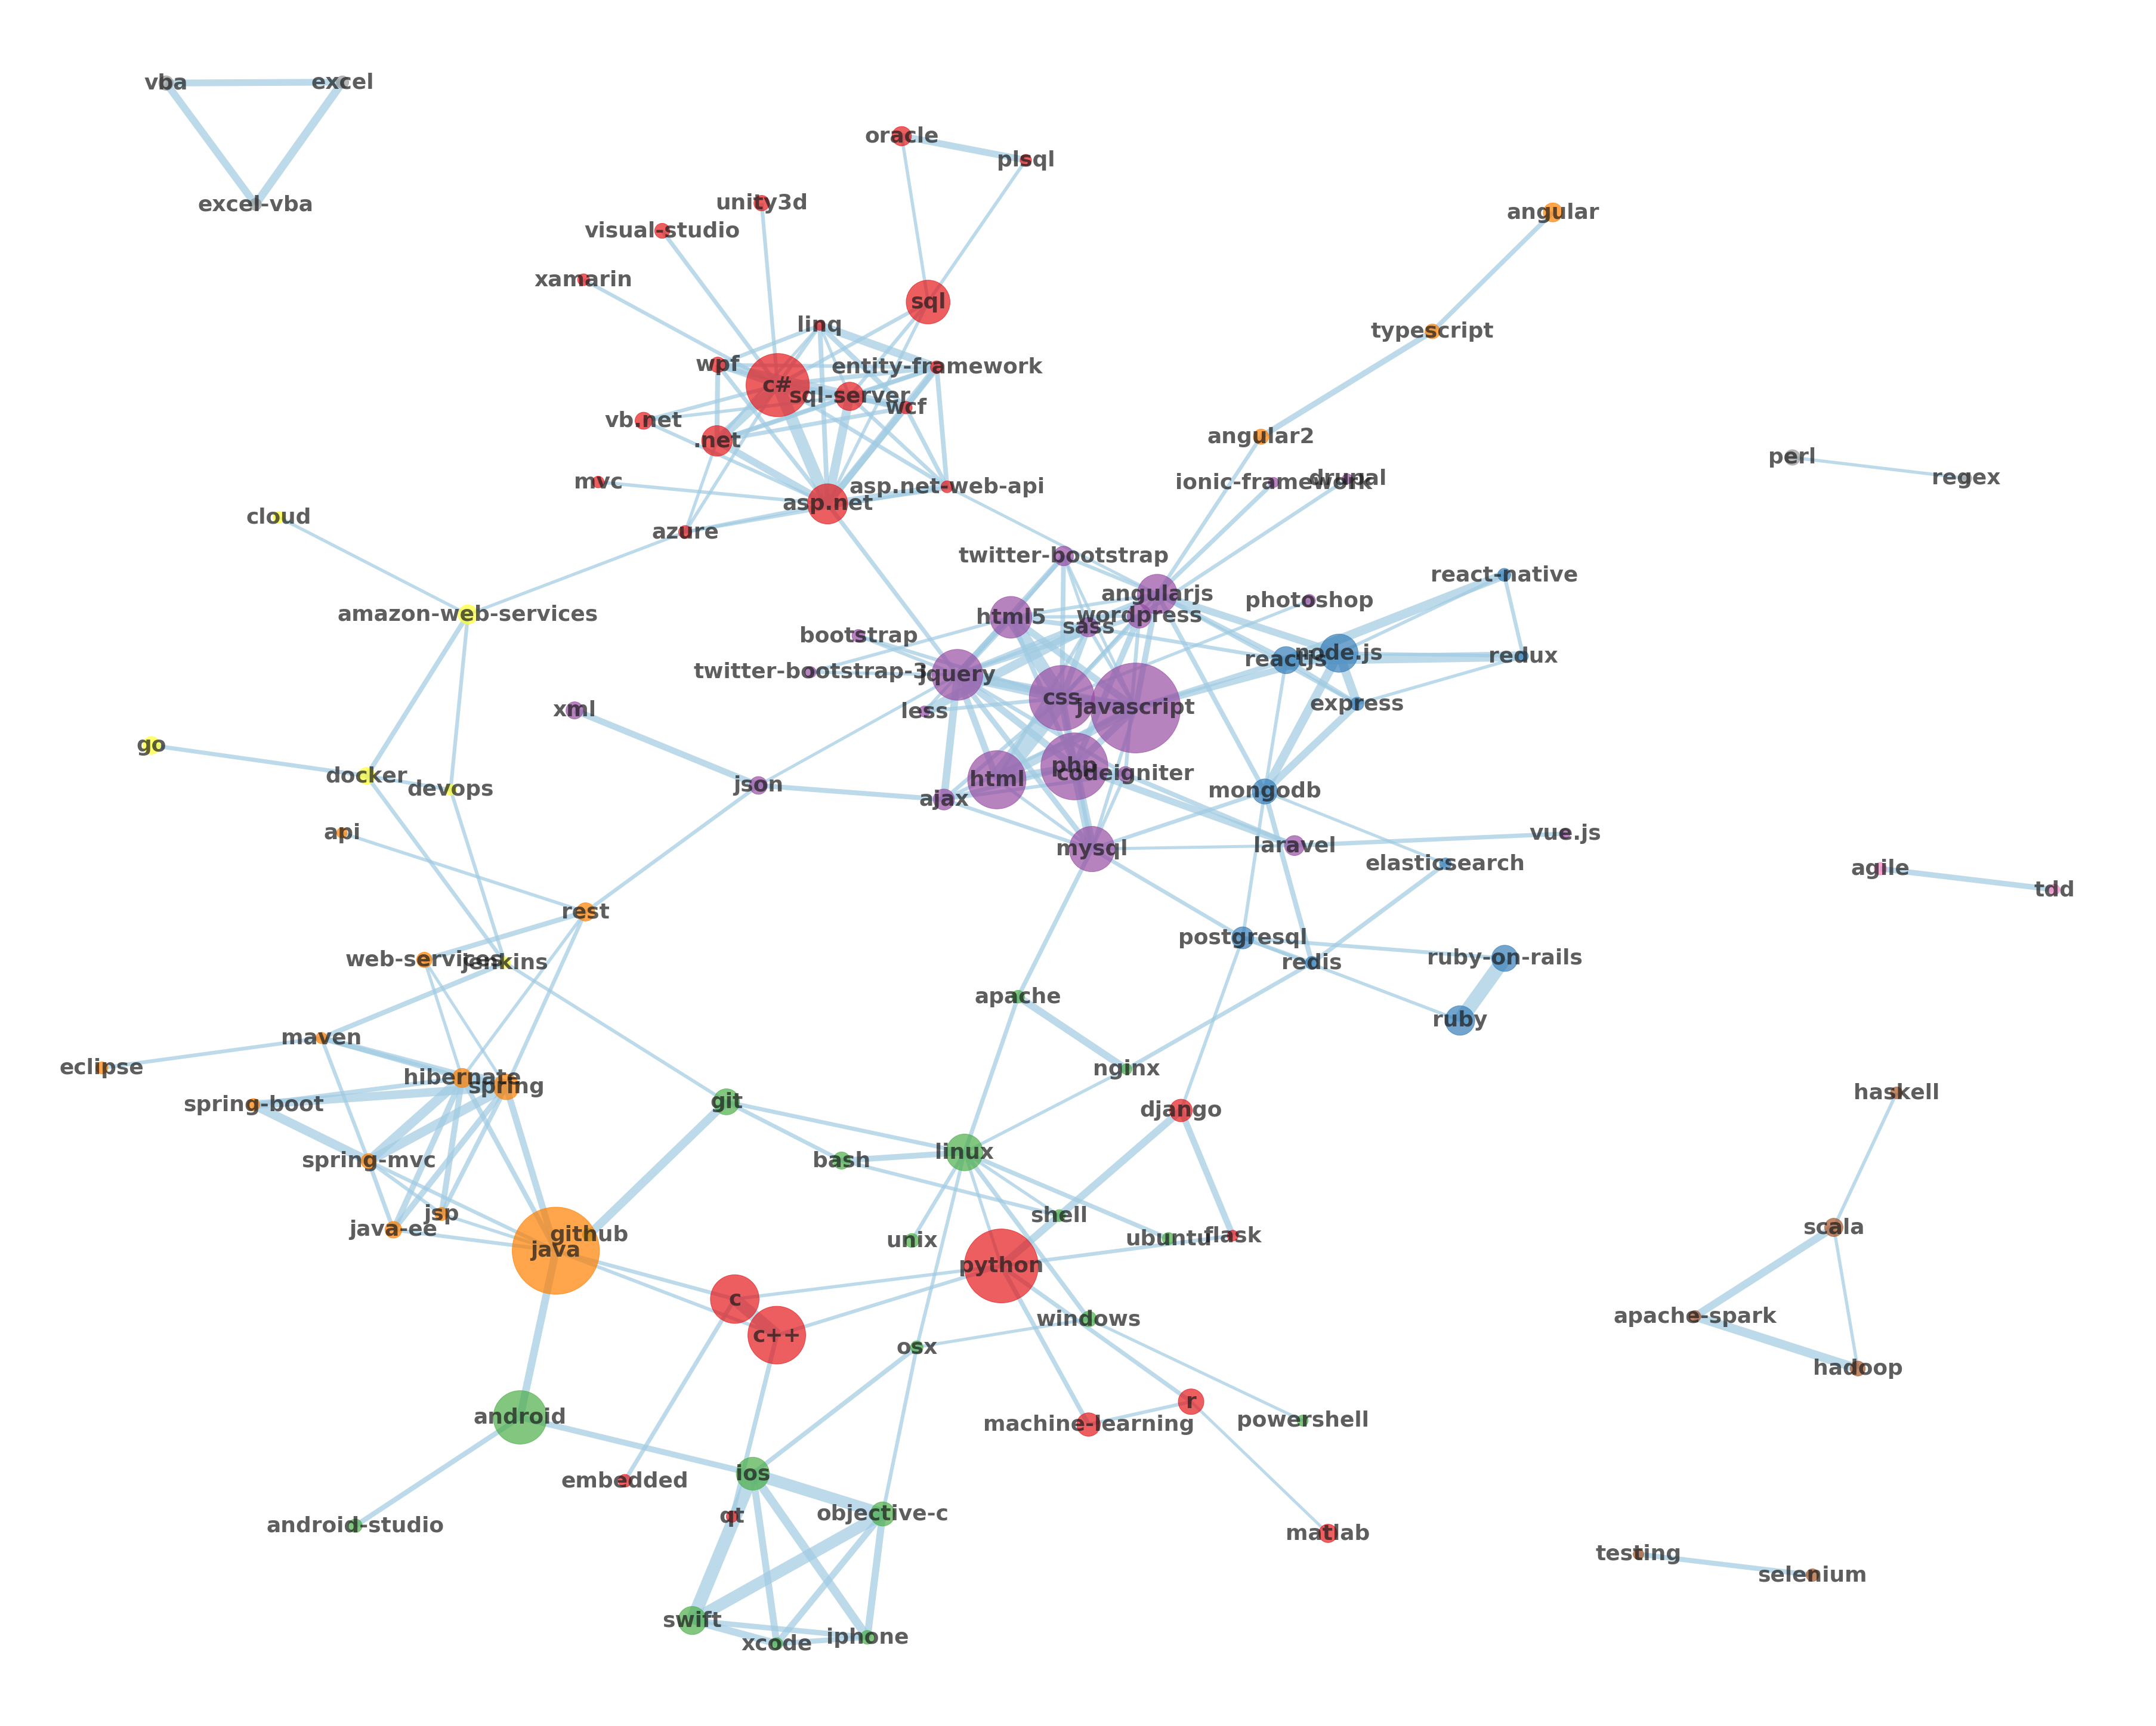

In [24]:
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz

plt.figure(figsize=(50,40))
pos=graphviz_layout(g,  prog="neato")

options = {
    'node_size': language_size,
    'line_color': '#A0CBE2',
    'edge_color': '#A0CBE2',
    'dpi':4000,
    'linewidth':linewidths,
    'width': linewidths,
    'font_size':36,
    'font_weight':'bold',
    'alpha':0.7
}
nx.draw(g, pos = pos, cmap=plt.cm.Set1, with_labels=True, node_color=colors, **options) 